<a href="https://colab.research.google.com/github/JAEHYEONG8121/Projects/blob/master/00_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 로드 및 기본 정보 확인

In [ ]:
import pandas as pd

# 1-1. 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dacon/train.csv')

###데이터 기본 분석

**1. 행(Rows)**
- 이 데이터셋의 각 행은 개별 환자를 나타내며, 해당 환자의 유전체 변이 정보를 담고 있다.
- 행이 6201행이 존재 -> 6201명의 환자 or 6201개의 샘플에 대한 데이터가 존재한다는 의미.

**2. 열(Columns)**
- 이 데이터셋에는 총 4386개의 열이 있으먀, 이 중 2개의 열('ID', 'SUBCLASS')과 4384개의 유전체 관련 특성들이 있다.

  2-1. 'ID'
  - ID는 각 샘플에 고유하게 부여된 식별자이다. 각 환자 또는 샘플마다 유일한 값이며, 이 값을 통해 데이터를 개별적으로 식별 가능하다.

  2-2. 'SUBCLASS'
  - SUBCLASS는 각 샘플에 대한 암종(암의 종류)를 나타낸다.
  - 이 열은 타겟 변수로, 총 26개의 서로 다른 암종이 존재한다.
  - 모델은 주어진 유전체 변이 데이터를 바탕으로 각 샘플이 어떤 암종에 속하는지를 예측하는 것이 목표이다.

  2-3. 유전체 관련 4,384개의 Column
  - 각 샘플(환자)의 유전체 변이 정보를 나타낸다.
  - 각 열은 특정 유전체 변이를 나타내며, 변이의 존재 여부나 그 특성을 기록한 데이터이다.

**3. 데이터의 의미**
- 이 데이터셋은 환자의 유전체 변이 정보를 바탕으로 암종을 분류하기 위한 것이다.
- 학습 목적으로, 모델은 이 데이터를 이용하여 유전체 변이와 암종 간의 상관관계를 학습하게 된다.
- 예측 목표는 주어진 유전체 변이로부터 암종을 예측하는 것이다.

***

In [ ]:
# 1-2. 데이터 기본 정보 확인

# 데이터 크기 확인
print("Data shape: ", train.shape)

# 데이터 타입 및 결측치 확인
print(train.info())

# 데이터의 처음 몇 행 확인
print(train.head())

Data shape:  (6201, 4386)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Columns: 4386 entries, ID to ZYX
dtypes: object(4386)
memory usage: 207.5+ MB
None
           ID SUBCLASS    A2M AAAS AADAT AARS1 ABAT ABCA1 ABCA2 ABCA3  ...  \
0  TRAIN_0000    KIPAN     WT   WT    WT    WT   WT    WT    WT    WT  ...   
1  TRAIN_0001     SARC     WT   WT    WT    WT   WT    WT    WT    WT  ...   
2  TRAIN_0002     SKCM  R895R   WT    WT    WT   WT    WT    WT    WT  ...   
3  TRAIN_0003     KIRC     WT   WT    WT    WT   WT    WT    WT    WT  ...   
4  TRAIN_0004   GBMLGG     WT   WT    WT    WT   WT    WT    WT    WT  ...   

  ZNF292 ZNF365 ZNF639 ZNF707 ZNFX1 ZNRF4 ZPBP ZW10 ZWINT ZYX  
0     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
1     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
2     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
3     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
4     WT     WT     WT     W

In [ ]:
# 1-3. 기초 통계량 확인
print(train.describe())

                ID SUBCLASS   A2M  AAAS AADAT AARS1  ABAT ABCA1 ABCA2 ABCA3  \
count         6201     6201  6201  6201  6201  6201  6201  6201  6201  6201   
unique        6201       26   141    43    25     1    48   145   119   129   
top     TRAIN_0000     BRCA    WT    WT    WT    WT    WT    WT    WT    WT   
freq             1      786  6053  6157  6176  6201  6153  6045  6079  6069   

        ... ZNF292 ZNF365 ZNF639 ZNF707 ZNFX1 ZNRF4  ZPBP  ZW10 ZWINT   ZYX  
count   ...   6201   6201   6201   6201  6201  6201  6201  6201  6201  6201  
unique  ...    168     69     33     27   126    61    53    53    35    41  
top     ...     WT     WT     WT     WT    WT    WT    WT    WT    WT    WT  
freq    ...   6025   6131   6169   6174  6065  6139  6143  6142  6166  6159  

[4 rows x 4386 columns]


***
### 2. 데이터 분포 및 시각화

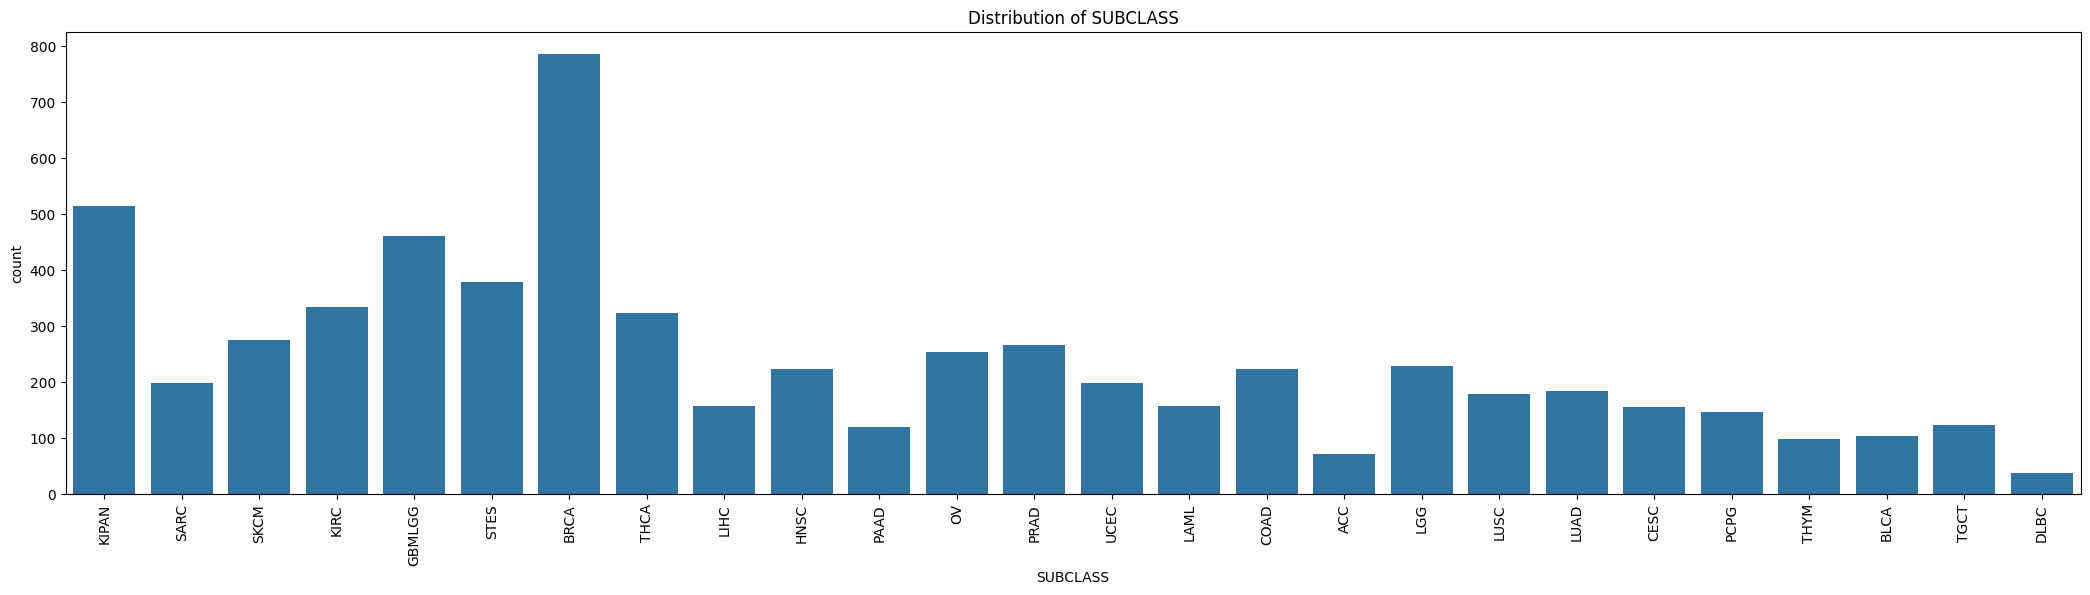

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2-1. SUBCLASS 분포 확인 : 이는 데이터가 균형 잡혀 있는지, 아니면 특정 클래스에 치우쳐 있는지를 판단 가능
plt.figure(figsize=(26, 6))
sns.countplot(data=train, x='SUBCLASS')
plt.xticks(rotation=90)
plt.title('Distribution of SUBCLASS')
plt.show()

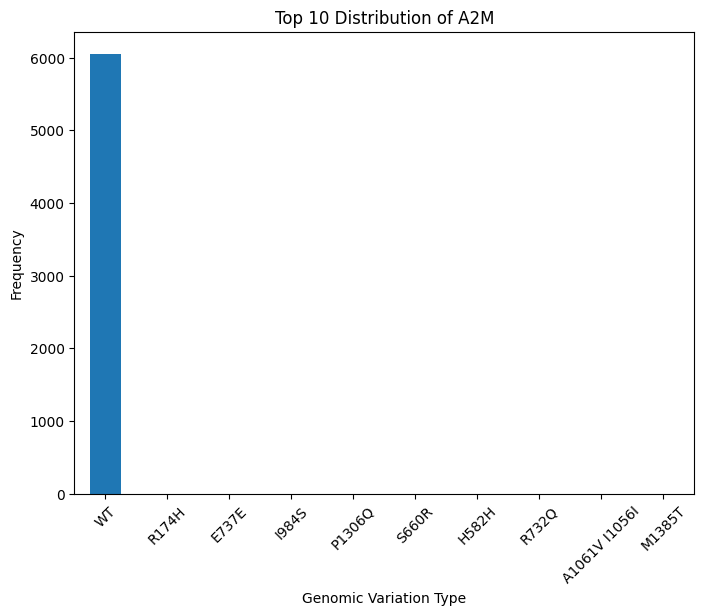

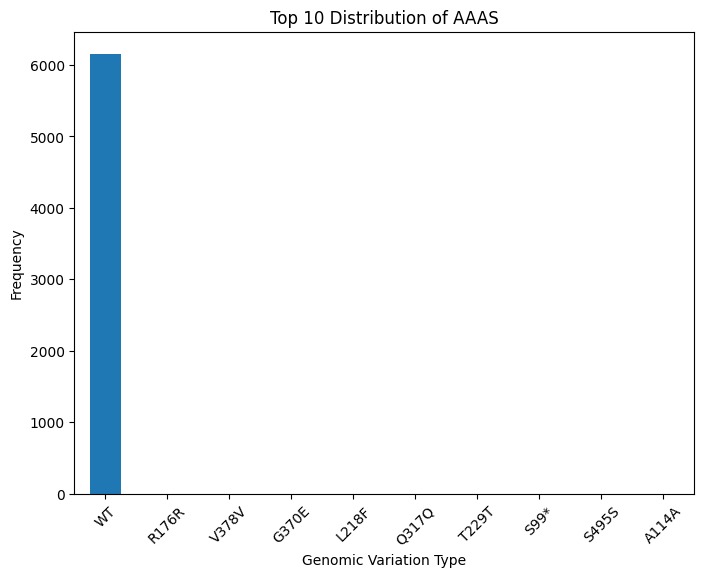

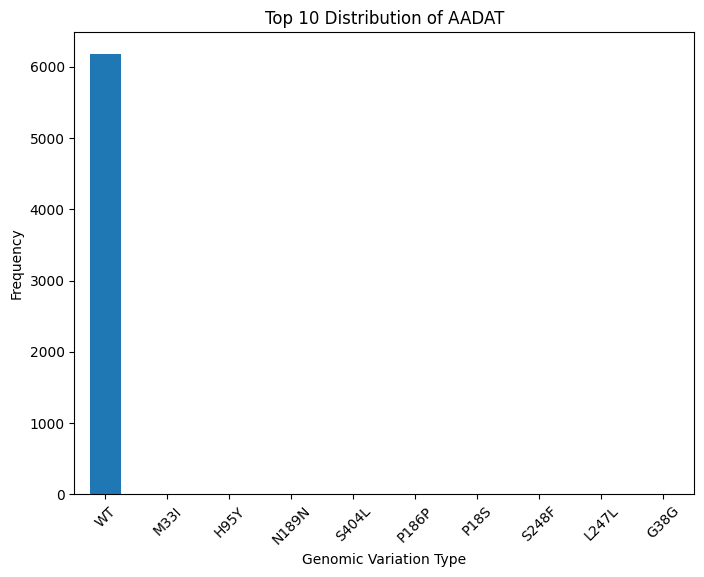

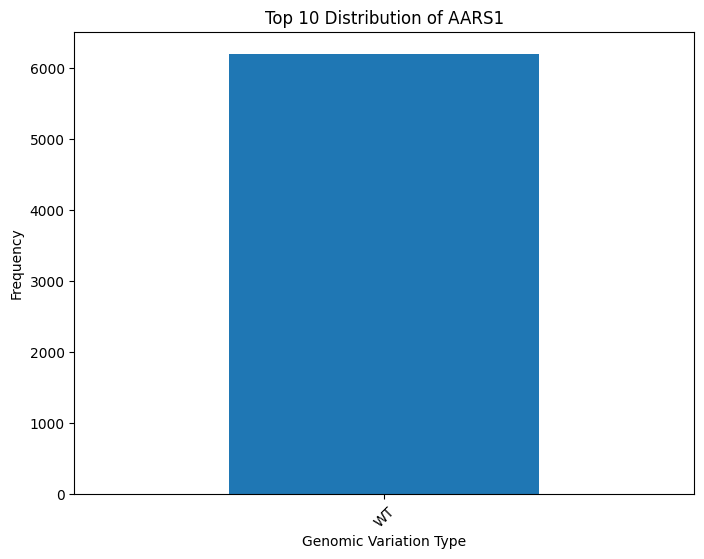

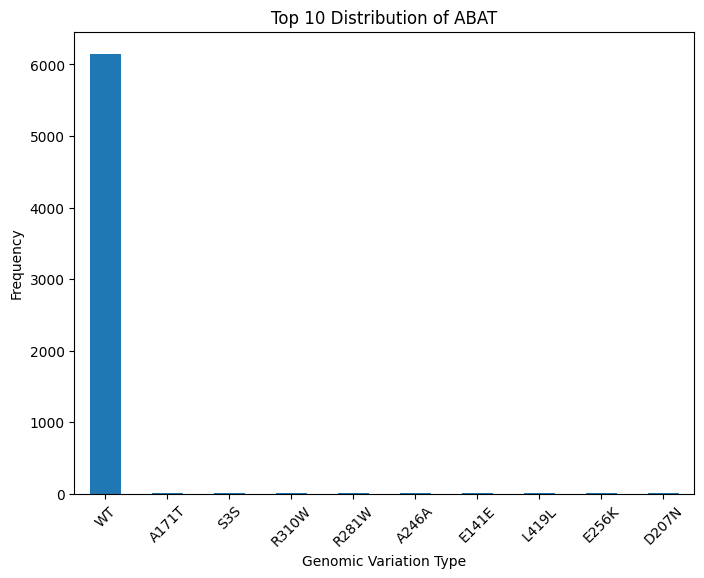

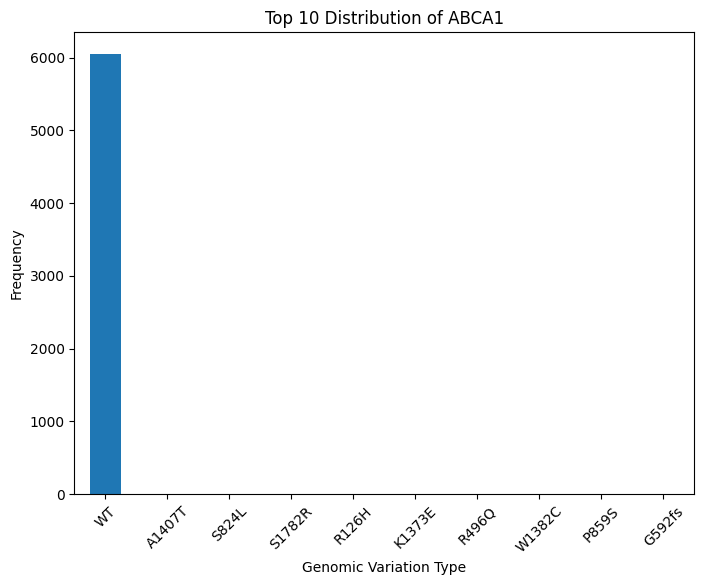

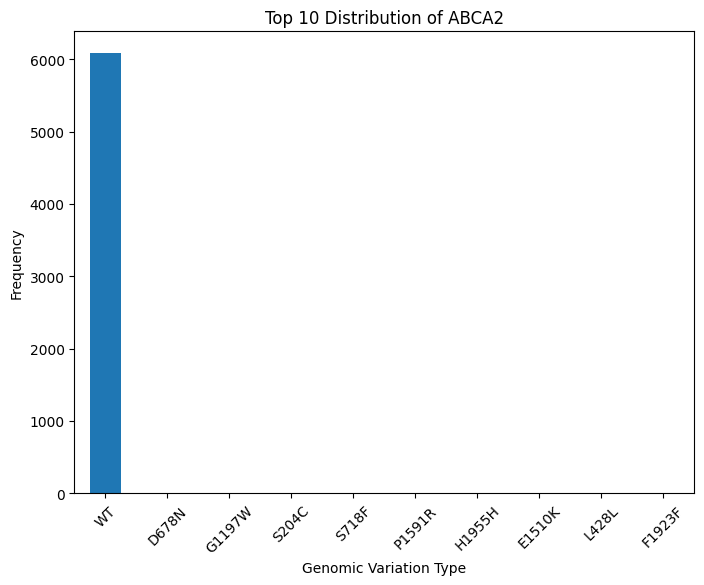

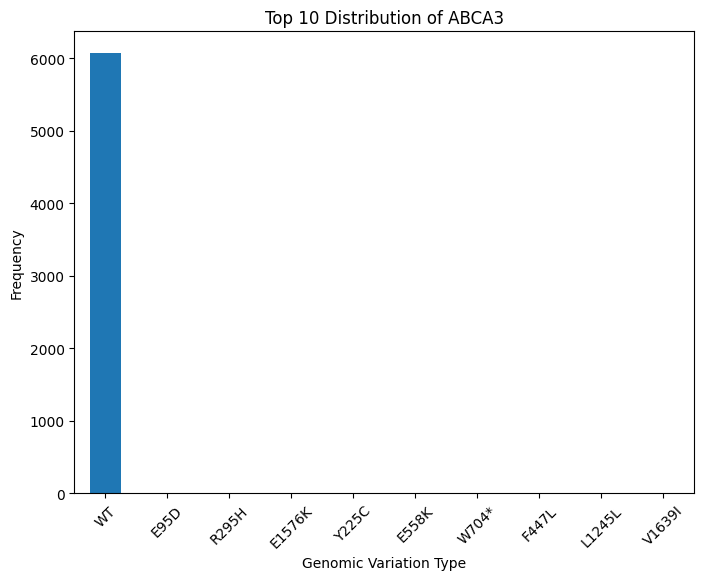

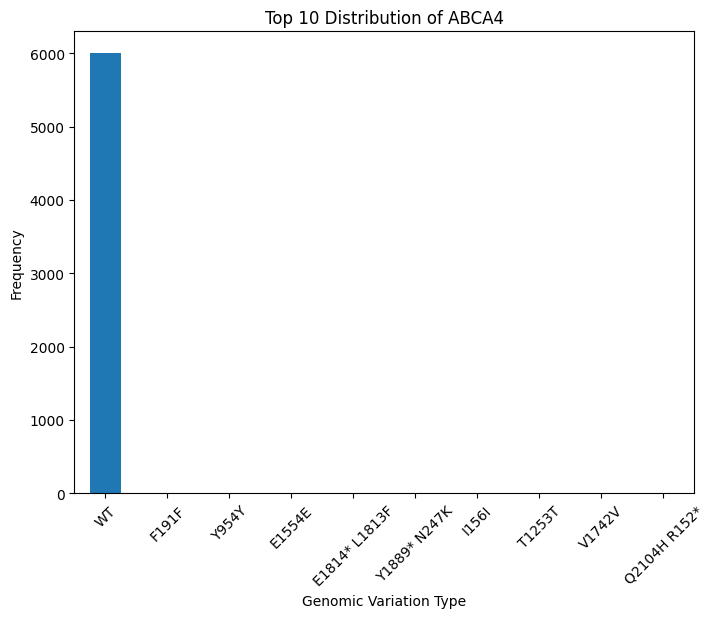

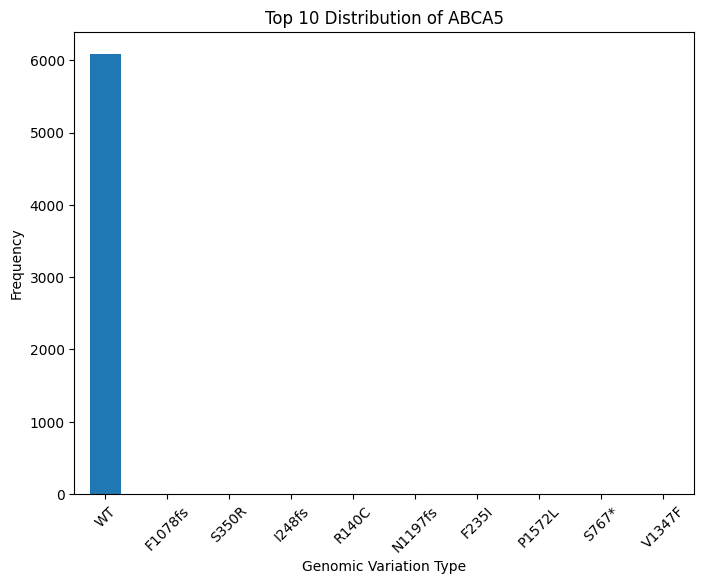

In [ ]:
# 2-2. 유전체 변이 데이터 분포 확인

#print(train.dtypes)
# 예시로 사용할 10개의 유전체 관련 컬럼 선택 (3번째 열부터 12번째 열까지)
selected_cols = train.columns[2:12]

# 선택된 10개 유전체 변이 컬럼의 분포 시각화
for col in selected_cols:
    plt.figure(figsize=(8, 6))

    # 각 컬럼에서 상위 10개의 변이 종류만 선택
    value_counts = train[col].value_counts().nlargest(10)

    # 막대그래프 시각화
    value_counts.plot(kind='bar')
    plt.title(f'Top 10 Distribution of {col}')
    plt.xlabel('Genomic Variation Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# KIPAN 정보만 살펴보기
kipan_data = train[train['SUBCLASS'] == 'KIPAN']
print(kipan_data)

              ID SUBCLASS A2M AAAS AADAT AARS1 ABAT ABCA1 ABCA2 ABCA3  ...  \
0     TRAIN_0000    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
16    TRAIN_0016    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
17    TRAIN_0017    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
59    TRAIN_0059    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
66    TRAIN_0066    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
...          ...      ...  ..  ...   ...   ...  ...   ...   ...   ...  ...   
6132  TRAIN_6132    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
6137  TRAIN_6137    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
6163  TRAIN_6163    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
6186  TRAIN_6186    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
6194  TRAIN_6194    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   

     ZNF292 ZNF365 ZNF639 ZNF707  ZNFX1 ZNRF4 ZPBP ZW10 ZWINT Z

In [ ]:
# 유전체 변이 컬럼들만 선택
genomic_columns = kipan_data.columns[2:]  # 2번째 열부터 유전체 변이 정보

# WT가 아닌 값을 갖는 열을 찾기
non_wt_columns = []

for col in genomic_columns:
    if (kipan_data[col] == 'WT').all():  # 하나라도 WT가 아닌 값이 있으면 추가
        non_wt_columns.append(col)

# WT가 아닌 값을 갖는 열들의 목록 출력
print("Columns with non-WT values in KIPAN samples:")
print(non_wt_columns)
print(len(non_wt_columns))

Columns with non-WT values in KIPAN samples:
['AARS1', 'ABAT', 'ABHD4', 'ACAA2', 'ACAT2', 'ACHE', 'ACOX1', 'ACRBP', 'ACRV1', 'ACSL5', 'ACTL7B', 'ACTN3', 'ACTN4', 'ACTR3', 'ADAM15', 'ADGRA2', 'ADGRE1', 'ADGRG1', 'ADGRL2', 'ADGRL4', 'ADH1C', 'ADH7', 'ADIPOQ', 'ADIPOR1', 'ADIPOR2', 'ADM', 'ADRA1B', 'ADRA2C', 'ADRM1', 'AEN', 'AGER', 'AGPAT3', 'AGPAT4', 'AGR2', 'AHSP', 'AIMP2', 'AK1', 'AK3', 'AK4', 'AKAP4', 'AKR1B10', 'AKR1C3', 'AKR1D1', 'AKT1S1', 'ALDH6A1', 'ALDH7A1', 'AMIGO1', 'AMIGO2', 'AMMECR1', 'ANG', 'ANKRA2', 'ANKRD2', 'ANXA4', 'ANXA5', 'ANXA9', 'AP2S1', 'APAF1', 'APBB1', 'APLNR', 'APOA4', 'APOC1', 'APOC2', 'APOD', 'APOE', 'APRT', 'ARF4', 'ARFGAP1', 'ARHGAP27', 'ARHGAP4', 'ARHGDIA', 'ARHGEF9', 'ARL3', 'ARL4A', 'ARL8A', 'ARPC3', 'ARPP19', 'ARRB2', 'ARTN', 'ASB13', 'ASF1A', 'ASF1B', 'ATAD2', 'ATF3', 'ATF4', 'ATG4A', 'ATG4B', 'ATOX1', 'ATP2C1', 'ATP5F1A', 'ATP5F1B', 'ATP5F1C', 'ATP5F1D', 'ATP5F1E', 'ATP5MC1', 'ATP5MC2', 'ATP5MC3', 'ATP5ME', 'ATP5MF', 'ATP5MG', 'ATP5PB', 'ATP5PD', 'ATP5P

***
### 3. 전처리

**유전체 변이 정보**

- 단백질 수준에서 변이를 나타내는 변이 정보의 표기법을 먼저 알자.
- (원래 아미노산) (번호) (바뀐 아미노산) 과 같다.
- 그렇다면 유전체 변이 정보 중에 아미노산이 바뀐 것은 당연히 큰 의미를 갖는다.
- 하지만, 아미노산이 바뀌지 않은 예를 들어, R895R과 같은 변이는 일반적으로 synonymous mutation(침묵 돌연변이)라고 불리며, 단백질의 기능에는 영향을 미치지 않기 때문에 암종을 분류하거나 암을 진단할 때 중요한 변이로 고려하지 않는다.
- 그러므로 train.csv에서 앞 대문자와 맨 뒤 대문자가 같은 유전체 변이 정보를 모두 WT로 취급하여 WT로 전처리해보자.


In [ ]:
# 아미노산 변화 없는 것들은 WT로 처리하기

# 유전체 변이 정보가 포함된 열 선택 (ID, SUBCLASS 제외)
genomic_columns = train.columns[2:]  # 2번째 열부터 유전체 변이 정보

# 앞과 뒤의 대문자가 같은 변이를 WT로 변환하는 함수 정의
def convert_to_wt(variant):
    # WT는 그대로 유지
    if variant == 'WT':
        return 'WT'

    # 앞의 문자와 뒤의 문자가 같은 경우 WT로 변환
    if len(variant) >= 2 and variant[0] == variant[-1]:
        return 'WT'

    # 나머지는 그대로 반환
    return variant

# 각 유전체 변이 컬럼에 대해 변이 정보 전처리 적용
for col in genomic_columns:
    train[col] = train[col].apply(convert_to_wt)

# 전처리된 데이터 확인
print(train.head())

           ID SUBCLASS A2M AAAS AADAT AARS1 ABAT ABCA1 ABCA2 ABCA3  ...  \
0  TRAIN_0000    KIPAN  WT   WT    WT    WT   WT    WT    WT    WT  ...   
1  TRAIN_0001     SARC  WT   WT    WT    WT   WT    WT    WT    WT  ...   
2  TRAIN_0002     SKCM  WT   WT    WT    WT   WT    WT    WT    WT  ...   
3  TRAIN_0003     KIRC  WT   WT    WT    WT   WT    WT    WT    WT  ...   
4  TRAIN_0004   GBMLGG  WT   WT    WT    WT   WT    WT    WT    WT  ...   

  ZNF292 ZNF365 ZNF639 ZNF707 ZNFX1 ZNRF4 ZPBP ZW10 ZWINT ZYX  
0     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
1     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
2     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
3     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  
4     WT     WT     WT     WT    WT    WT   WT   WT    WT  WT  

[5 rows x 4386 columns]


In [ ]:
# 전처리된 데이터를 새로운 CSV 파일로 저장
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Dacon/processed_train.csv'  # 파일 경로 설정
train.to_csv(output_file_path, index=False)

# 저장 완료 메시지 출력
print(f"전처리된 데이터가 {output_file_path}에 저장되었습니다.")

전처리된 데이터가 /content/drive/MyDrive/Colab Notebooks/Dacon/processed_train.csv에 저장되었습니다.


***
### 4. 학습

In [43]:
# 4-1. 데이터 불러오기 & 변이 정보 label encoding

# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dacon/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dacon/test.csv')

# SUBCLASS 가 범주형이기 때문에 LabelEncoder 사용
le_subclass = LabelEncoder()
train['SUBCLASS'] = le_subclass.fit_transform(train['SUBCLASS'])

# 변환된 레이블 확인
for i, label in enumerate(le_subclass.classes_):
    print(f"원래 레이블: {label}, 변환된 숫자: {i}")

원래 레이블: ACC, 변환된 숫자: 0
원래 레이블: BLCA, 변환된 숫자: 1
원래 레이블: BRCA, 변환된 숫자: 2
원래 레이블: CESC, 변환된 숫자: 3
원래 레이블: COAD, 변환된 숫자: 4
원래 레이블: DLBC, 변환된 숫자: 5
원래 레이블: GBMLGG, 변환된 숫자: 6
원래 레이블: HNSC, 변환된 숫자: 7
원래 레이블: KIPAN, 변환된 숫자: 8
원래 레이블: KIRC, 변환된 숫자: 9
원래 레이블: LAML, 변환된 숫자: 10
원래 레이블: LGG, 변환된 숫자: 11
원래 레이블: LIHC, 변환된 숫자: 12
원래 레이블: LUAD, 변환된 숫자: 13
원래 레이블: LUSC, 변환된 숫자: 14
원래 레이블: OV, 변환된 숫자: 15
원래 레이블: PAAD, 변환된 숫자: 16
원래 레이블: PCPG, 변환된 숫자: 17
원래 레이블: PRAD, 변환된 숫자: 18
원래 레이블: SARC, 변환된 숫자: 19
원래 레이블: SKCM, 변환된 숫자: 20
원래 레이블: STES, 변환된 숫자: 21
원래 레이블: TGCT, 변환된 숫자: 22
원래 레이블: THCA, 변환된 숫자: 23
원래 레이블: THYM, 변환된 숫자: 24
원래 레이블: UCEC, 변환된 숫자: 25


In [44]:
# 4-2. Target label encoding, 학습 데이터 & 타겟 데이터 분리
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# 변이 정보를 라벨링하는 함수 정의
def label_variant(variant):
    # 변이가 여러 개일 경우 공백으로 분리
    variants = variant.split(' ')

    # 우선순위에 따른 초기 값 설정 (WT를 기본값으로 시작)
    highest_priority = 0  # WT로 초기화

    for v in variants:
        if v == 'WT':
            continue  # WT는 우선순위에서 가장 낮으므로 pass
        elif v[-1] == '*':
            highest_priority = max(highest_priority, 2)  # 넌센스 돌연변이 우선순위가 가장 높음
        elif v[0] != v[-1]:
            highest_priority = max(highest_priority, 1)  # 미스센스 돌연변이

    return highest_priority


# 유전체 변이 데이터가 포함된 열 선택 (ID, SUBCLASS 제외)
genomic_columns = train.columns[2:]  # 유전체 변이 정보가 있는 열들

# 각 유전체 변이에 대해 라벨링 적용 (우선순위에 따라 0, 1, 2할당)
for col in genomic_columns:
    train[col] = train[col].apply(label_variant)

# SUBCLASS와 ID를 제외한 데이터 준비
X = train.drop(columns=['SUBCLASS', 'ID'])
y_subclass = train['SUBCLASS']

# X의 범주형 열 찾기
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# 범주형 열에 대해 OrdinalEncoder를 적용하여 인코딩
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 범주형 열을 인코딩하여 X_encoded 데이터 생성
X_encoded = X.copy()
X_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# 인코딩된 데이터 확인
print(X_encoded.head())

   A2M  AAAS  AADAT  AARS1  ABAT  ABCA1  ABCA2  ABCA3  ABCA4  ABCA5  ...  \
0    0     0      0      0     0      0      0      0      0      0  ...   
1    0     0      0      0     0      0      0      0      0      0  ...   
2    0     0      0      0     0      0      0      0      0      0  ...   
3    0     0      0      0     0      0      0      0      0      0  ...   
4    0     0      0      0     0      0      0      0      0      0  ...   

   ZNF292  ZNF365  ZNF639  ZNF707  ZNFX1  ZNRF4  ZPBP  ZW10  ZWINT  ZYX  
0       0       0       0       0      0      0     0     0      0    0  
1       0       0       0       0      0      0     0     0      0    0  
2       0       0       0       0      0      0     0     0      0    0  
3       0       0       0       0      0      0     0     0      0    0  
4       0       0       0       0      0      0     0     0      0    0  

[5 rows x 4384 columns]


In [45]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [46]:
model.fit(X_encoded, y_subclass)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
# SUBCLASS와 ID를 제외한 데이터 준비
test_X = test.drop(columns=['ID'])

# X의 범주형 열 찾기
categorical_columns = test_X.select_dtypes(include=['object', 'category']).columns

# 범주형 열에 대해 OrdinalEncoder를 적용하여 인코딩
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 범주형 열을 인코딩하여 X_encoded 데이터 생성
X_encoded = test_X.copy()

# 인코딩되지 않은 열이 있으면 다시 변환 적용
X_encoded[categorical_columns] = ordinal_encoder.fit_transform(X_encoded[categorical_columns])

# 인코딩된 데이터 타입 확인 (모든 열이 숫자형이어야 함)
print(X_encoded.dtypes)

A2M      float64
AAAS     float64
AADAT    float64
AARS1    float64
ABAT     float64
          ...   
ZNRF4    float64
ZPBP     float64
ZW10     float64
ZWINT    float64
ZYX      float64
Length: 4384, dtype: object


In [48]:
predictions = model.predict(X_encoded)
print(predictions)

[5 5 5 ... 5 5 5]


In [49]:
original_labels = le_subclass.inverse_transform(predictions)

In [50]:
print(original_labels)

['DLBC' 'DLBC' 'DLBC' ... 'DLBC' 'DLBC' 'DLBC']


In [52]:
submisson = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dacon/sample_submission.csv")

submisson["SUBCLASS"] = original_labels

submisson.to_csv('./baseline_submission.csv', encoding='UTF-8-sig', index=False)